In [2]:
from torchvision import models

In [3]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [4]:
alexnet = models.AlexNet()

In [5]:
resnet = models.resnet101(pretrained=True)

/Users/maton/PyTorch_Env/pytorch-env/lib/python3.13/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/maton/PyTorch_Env/pytorch-env/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /Users/maton/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:17<00:00, 10.1MB/s] 


In [6]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [7]:
from torchvision import transforms

preprocess = transforms.Compose(
    [
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

In [9]:
from PIL import Image

img = Image.open("../../data/p1ch2/bobby.jpg")

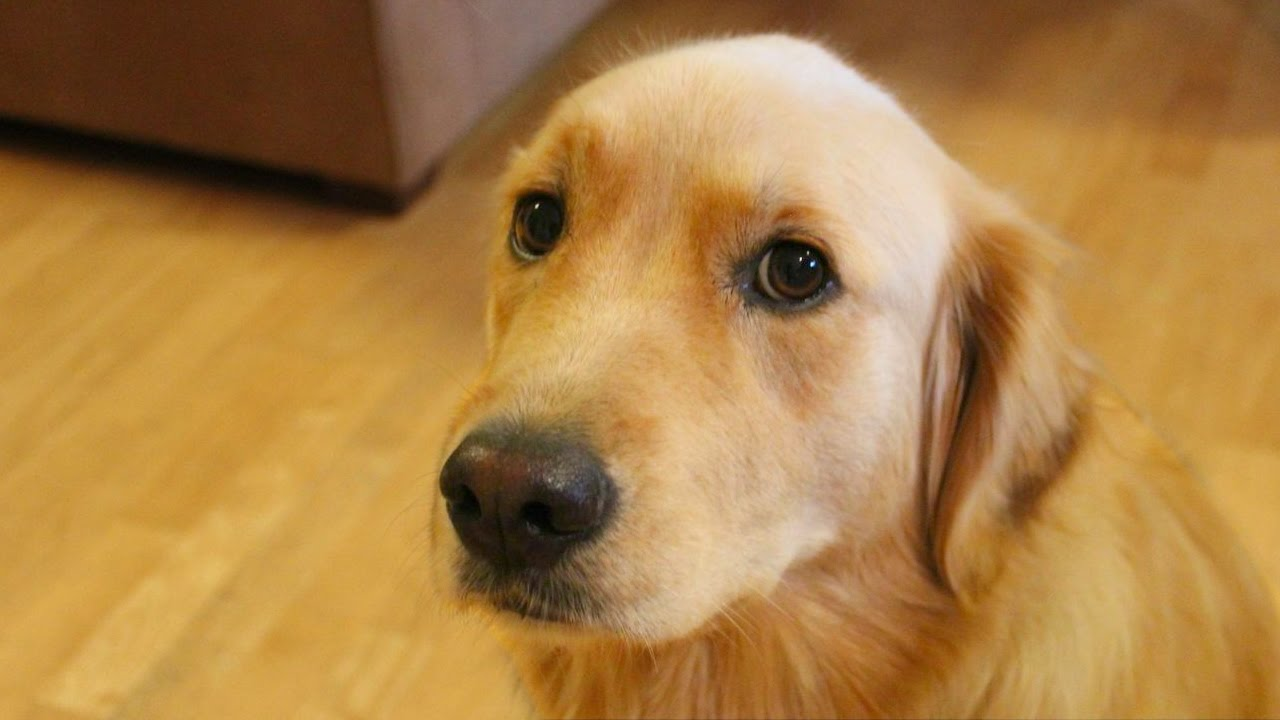

In [10]:
img

In [11]:
img_t = preprocess(img)

In [12]:
import torch

batch_t = torch.unsqueeze(img_t, 0)

In [13]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [14]:
out = resnet(batch_t)

out

tensor([[-3.4997e+00, -1.6490e+00, -2.4391e+00, -3.2243e+00, -3.2465e+00,
         -1.3218e+00, -2.0395e+00, -2.5405e+00, -1.3043e+00, -2.8827e+00,
         -1.6696e+00, -1.2838e+00, -2.6184e+00, -2.9750e+00, -2.4380e+00,
         -2.8256e+00, -3.3083e+00, -7.9667e-01, -6.7075e-01, -1.2162e+00,
         -3.0311e+00, -3.9593e+00, -2.2631e+00, -1.0843e+00, -9.7915e-01,
         -1.0742e+00, -3.0908e+00, -2.4751e+00, -2.2153e+00, -3.1932e+00,
         -3.2964e+00, -1.8507e+00, -2.0642e+00, -2.1202e+00, -1.8665e+00,
         -3.2375e+00, -1.1210e+00, -1.1321e+00, -1.1657e+00, -9.0362e-01,
         -4.5209e-01, -1.4986e+00,  1.4366e+00,  1.2994e-01, -1.8379e+00,
         -1.4815e+00,  9.7278e-01, -9.3662e-01, -3.0276e+00, -2.7341e+00,
         -2.5960e+00, -2.0591e+00, -1.8170e+00, -1.9437e+00, -1.7875e+00,
         -1.3029e+00, -4.5200e-01, -2.0560e+00, -3.2882e+00, -4.7583e-01,
         -3.6261e-01, -1.1650e+00, -7.3943e-01, -1.4489e+00, -1.5039e+00,
         -2.1096e+00, -1.7095e+00, -4.

In [15]:
with open("../../data/p1ch2/imagenet_classes.txt") as f:
    labels = [line.strip() for line in f.readlines()]

In [16]:
_, index = torch.max(out, 1)

In [17]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('golden retriever', 96.57190704345703)

In [18]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('golden retriever', 96.57190704345703),
 ('Labrador retriever', 2.608272075653076),
 ('cocker spaniel, English cocker spaniel, cocker', 0.2699628472328186),
 ('redbone', 0.17958979308605194),
 ('tennis ball', 0.10991984605789185)]